<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID


In [11]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
%matplotlib inline

In [12]:
df = pd.read_csv('Lyrical_data_5.csv',encoding='cp1252')
df.head(4)

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love


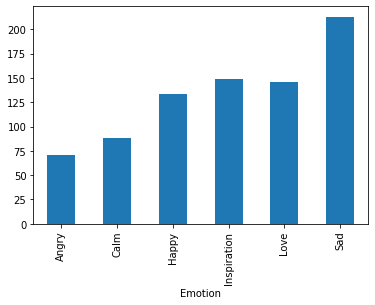

In [13]:
df.groupby('Emotion').Emotion.count().plot.bar(ylim=0)
plt.show()

In [14]:
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned'] = df['Chorus'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.head(4)

,Song_ID,Song_Title,Chorus,Emotion,cleaned
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration,diana let one light fire insid eye you lone yo...
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration,don forget belong home don forget belong home ...
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration,i sorri i say i need but i care i scare love c...
3,4,Happily,I don't care what people say when we're togeth...,Love,i care peopl say togeth you know i wanna one h...


In [16]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(800, 1325)

In [28]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['cleaned']
Y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=977)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

       Angry       0.50      0.23      0.32        13
        Calm       0.35      0.46      0.40        13
       Happy       0.50      0.29      0.37        24
 Inspiration       0.53      0.31      0.39        32
        Love       0.42      0.84      0.56        25
         Sad       0.52      0.53      0.52        53

    accuracy                           0.47       160
   macro avg       0.47      0.44      0.43       160
weighted avg       0.49      0.47      0.45       160

[[ 3  1  2  3  1  3]
 [ 0  6  3  0  0  4]
 [ 0  2  7  1  9  5]
 [ 1  3  1 10  7 10]
 [ 0  0  0  0 21  4]
 [ 2  5  1  5 12 28]]
